# 图像轮廓

# 1. 图像轮廓简介

① 边缘有一些零零散散的线段也可以当做边缘，反正梯度上下左右发生差异，就把它当做边缘了。

② 图像的轮廓必须是一个整体，不是零零散散的，而是连在一块的。

③ 图像**轮廓函数**：cv2.findContours(img,mode,method)

mode：轮廓检索模式
- RETR_EXTERNAL ：只检索最外面的轮廓。
- RETR_LIST：检索所有的轮廓，并将其保存到一条链表当中。
- RETR_CCOMP：检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界。
- RETR_TREE：检索所有的轮廓，并重构嵌套轮廓的整个层次。( **最常用** )

method：轮廓逼近方法
- CHAIN_APPROX_NONE：以Freeman链码的方式输出轮廓，如下图左所示。所有其他方法输出多边形 ( 顶点的序列 )，如下图右所示。
- CHAIN_APPROX_SIMPLE：压缩水平的、垂直的和斜的部分，也就是，函数**只保留他们的终点部分**，如下图右所示。

④ 为了更高的准确率，轮廓检测使用**二值图像**（也就是在进行轮廓检测之前，需要对图像进行**预处理成二值图像**）。

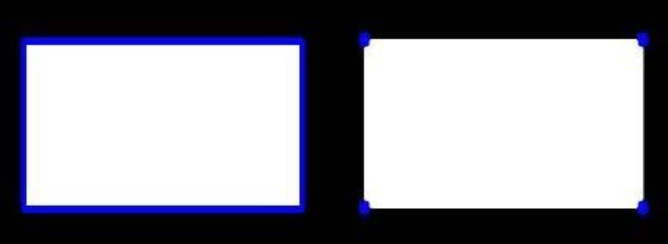

# 2. 绘制轮廓

## 2.1 图像二值化

In [1]:
import cv2 #opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包

# 魔法指令，直接展示图，Jupyter notebook特有
%matplotlib inline  

def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [2]:
img = cv2.imread('01_Picture/08_Car.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # 将图像从BGR转换为灰度格式，我的理解：将图像从3通道转换为单通道
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 转换成二值图像，大于17的取255，小于127的取0
cv_show(thresh,'thresh')

对彩色图像进行**预处理**，转换成**二值图像**
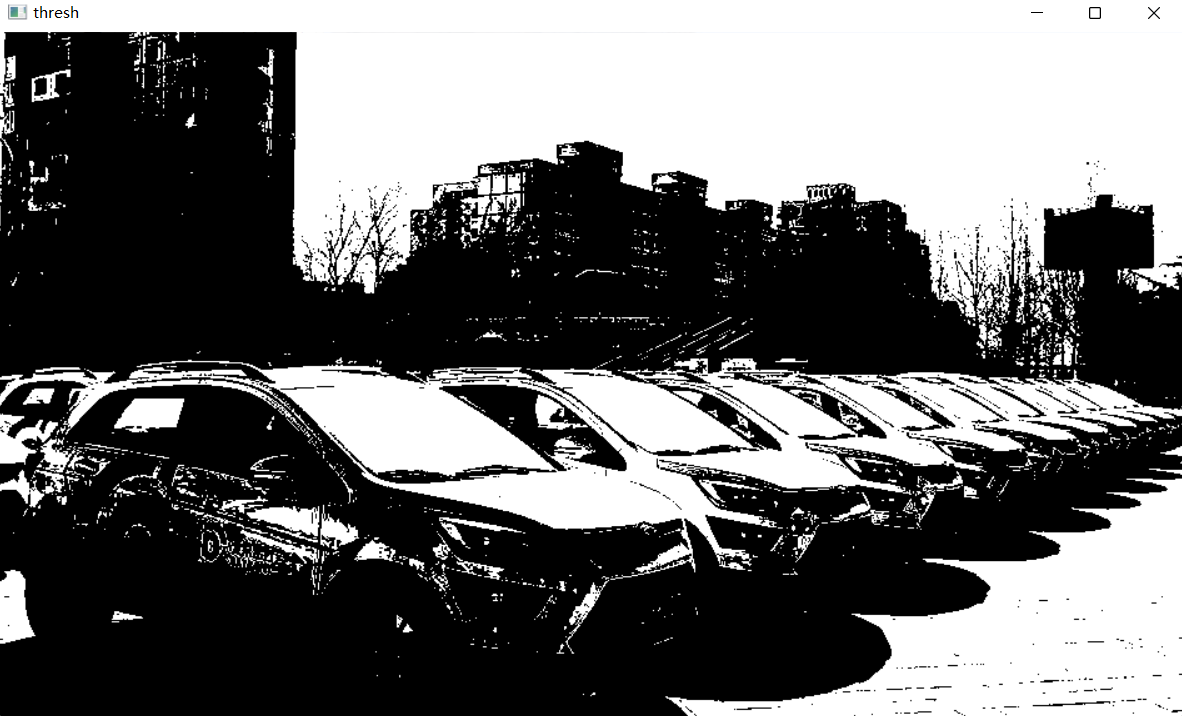

## 2.2 轮廓检测（findContours函数，contour翻译：轮廓）

findContours函数

contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

参数
    - 第一个thresh是源图像
    - 第二个cv.RETR_TREE是轮廓检索模式
    - 第三个cv.CHAIN_APPROX_SIMPLE是轮廓逼近方法
返回值
    - 轮廓列表contours
    - 轮廓层次hierarchy

In [3]:
# 做完二值后，再用图像轮廓检测函数再去做
# 旧版opencv，有三个返回值
# binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# 新版opencv，有两个返回值
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# 新版opencv相较于旧版，少了二值化后的图像
# cv_show(binary,'binary') # 返回的二值化后的图像
print(np.array(contours).shape) # 轮廓点的信息
print(hierarchy) # hierarchy 是把轮廓结果保存在层级结构当中，暂时用不上

(2579,)
[[[   1   -1   -1   -1]
  [   2    0   -1   -1]
  [   3    1   -1   -1]
  ...
  [  -1 2575 2577   -1]
  [2578   -1   -1 2576]
  [  -1 2577   -1 2576]]]


D:\Users\yrd\Anaconda3\envs\study\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


## 2.3 绘制所有轮廓(drawContours函数)

cv2.drawContours(image, contours, contourIdx, color[,thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]])

参数含义：
- img - 目标图像
- contours - 所有输入的轮廓
- contourIdx - 指定轮廓列表的索引 ID（将被绘制），若为负数，则所有的轮廓将会被绘制。
- color - 绘制轮廓的颜色。
- thickness - 绘制轮廓线条的宽度，若为负值或CV.FILLED则将填充轮廓内部区域
- lineType - Line connectivity,（有的翻译线型，有的翻译线的连通性）
- hierarchy - 层次结构信息，与函数findcontours()的hierarchy有关
- maxLevel - 绘制轮廓的最高级别。若为0，则绘制指定轮廓；若为1，则绘制该轮廓和所有嵌套轮廓（nested contours）；若为2，则绘制该轮廓、嵌套轮廓（nested contours）/子轮廓和嵌套-嵌套轮廓（all the nested-to-nested contours）/孙轮廓，等等。该参数只有在层级结构时才用到。
- offset - 按照偏移量移动所有的轮廓（点坐标）

In [4]:
# 传入参数：图像、轮廓、轮廓列表，颜色模式，线条厚度
# 注意需要copy，要不原图会变。。。
cv_show(img,'img')
draw_img = img.copy() # 若不用拷贝后的，而是用原图画轮廓，则画轮廓图绘把原始的输入图像重写，覆盖掉 
# # -1代表所有轮廓信息都画出来，(0,0,255)代表BGR三个通道的数值，这里是使用红色线条画出轮廓，2代表线条宽度
res = cv2.drawContours(draw_img,contours,-1,(0,0,255),2)
cv_show(res,'res')

根据**变量coutours**绘制**所有**轮廓信息
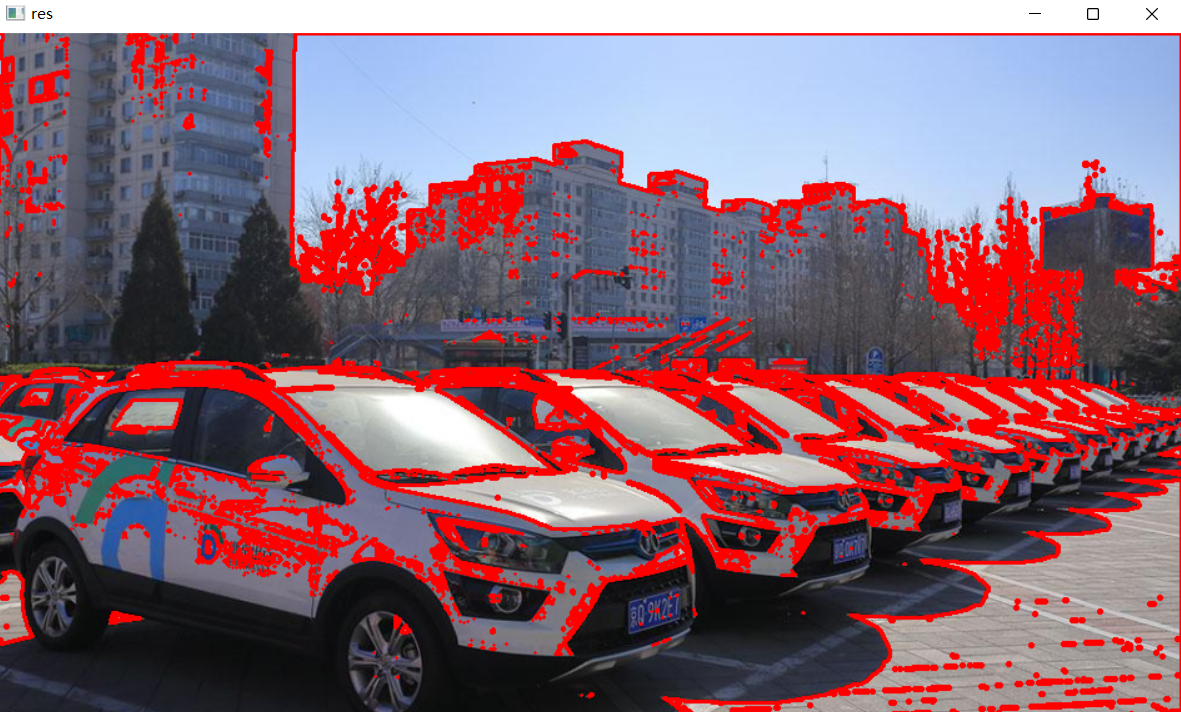

## 2.4 绘制某个轮廓

In [5]:
draw_img = img.copy()
res = cv2.drawContours(draw_img,contours,70,(0,0,255),2) # 画 70 号轮廓（还有另外一种绘制方法）
cv_show(res,'res')

展示第70号轮廓
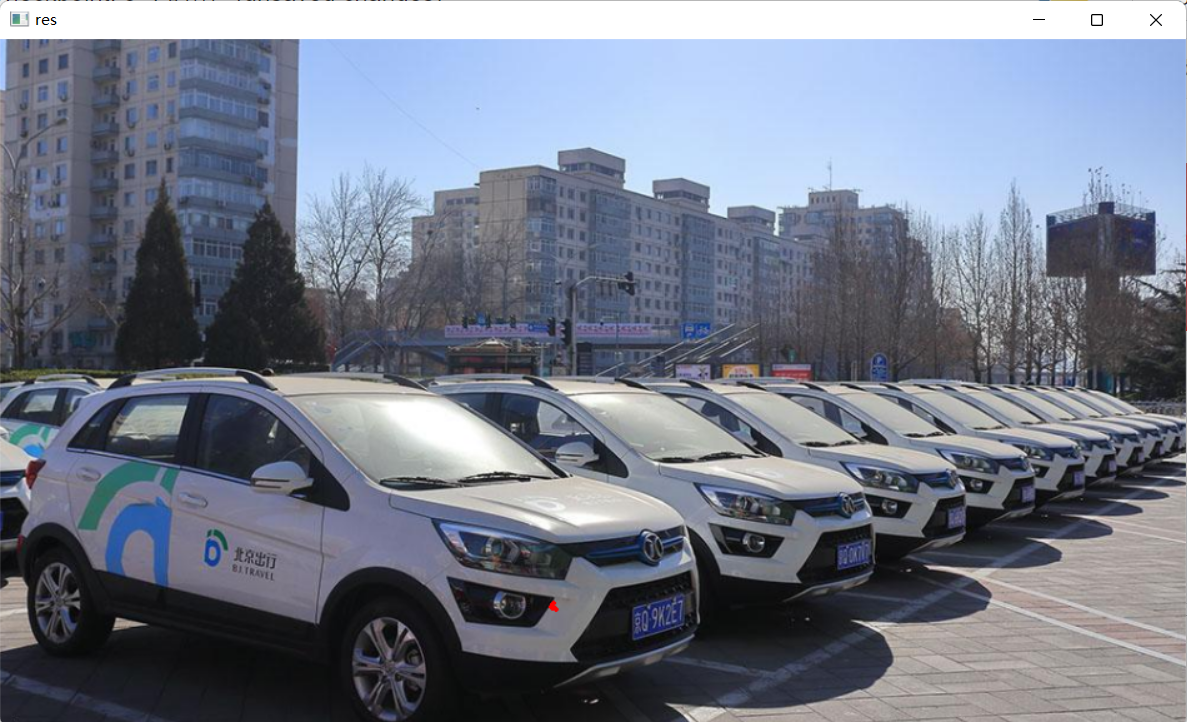

# 3. 轮廓特征提取（面积、周长等）

In [6]:
img = cv2.imread('01_Picture/10_contours.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 大于17的取255，小于127的取0       

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cnt = contours[0] # 通过轮廓索引，拿到该索引对应的轮廓特征

print(cv2.contourArea(cnt)) # 该轮廓的面积
print(cv2.arcLength(cnt,True)) # 该轮廓的周长，True表示闭合的

8500.5
437.9482651948929


# 4. 轮廓近似

① **正常轮廓**展示是最右边的图，但是当我们需要轮廓没有那么不规则，而是想要**轮廓近似成规则的形状**，这就叫**轮廓近似**，近似成下图中**中间图像的轮廓**。

② 一条呈抛物线的曲线的端点为 A、B 两点，取曲线上到直线 AB 距离最大的点，该点为 C 点，若 C 点到直线的距离小于设置的阈值，则可以把直线 AB 当做曲线的近似，若 C 点到直线的距离大于设置的阈值，那么曲线不能用直线 AB 来近似，而 AC 曲线可能用 AC 直线来代替、BC曲线可能用 BC 直线来代替。再通过阈值来判断是否可以代替。

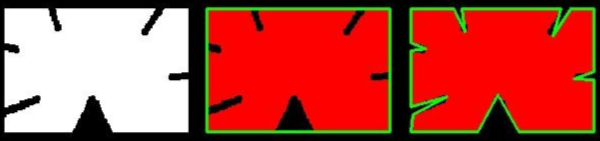

## 4.2 正常展示所有轮廓

In [9]:
img = cv2.imread('01_Picture/11_contours2.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # BGR格式转换成灰度图格式
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 得到二值图，大于127的取255，小于127的取0       

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) # 找出轮廓
draw_img = img.copy() # 若不用拷贝后的，而是用原图画轮廓，则画轮廓图绘把原始的输入图像重写，覆盖掉 
res = cv2.drawContours(draw_img,contours,-1,(0,0,255),2)# 画出所有轮廓
cv_show(res,'res')

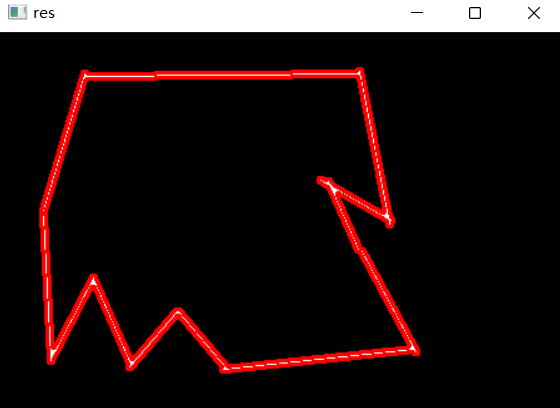

## 4.3 轮廓单个展示

In [10]:
img = cv2.imread('01_Picture/11_contours2.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # 将图像转换成单通道
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 将图像转换成二值图，大于17的取255，小于127的取0    

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) # 找出轮廓
cnt = contours[0] # 取索引为0的轮廓

draw_img = img.copy()
res = cv2.drawContours(draw_img,[cnt],-1,(0,0,255),2) # 展示cnt这个轮廓，用红线画出
cv_show(res,'res')

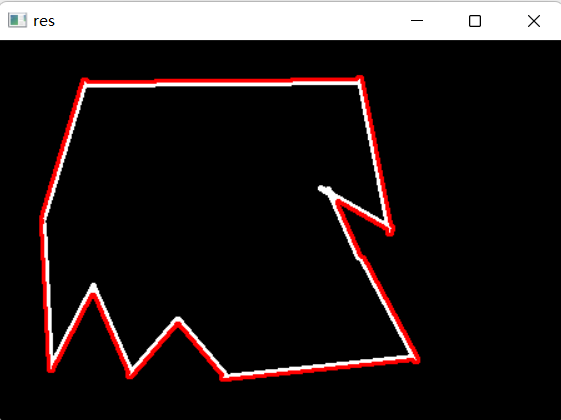

## 4.4 轮廓近似处理

In [11]:
epsilon = 0.1 * cv2.arcLength(cnt,True) # 周长的百分比，这里用0.1倍的周长作阈值
approx = cv2.approxPolyDP(cnt,epsilon,True) # 第二个参数为阈值，得到返回值为近似轮廓
draw_img = img.copy()
res = cv2.drawContours(draw_img,[approx],-1,(0,0,255),2) # 展示近似轮廓
cv_show(res,'res')

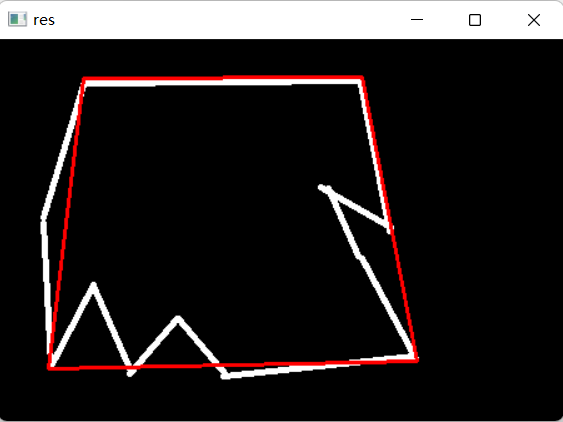

In [12]:
epsilon = 0.01 * cv2.arcLength(cnt,True) # 周长的百分比，这里用0.1倍的周长作阈值，这里把0.1换成0.01结果轮廓越近似
approx = cv2.approxPolyDP(cnt,epsilon,True) # 第二个参数为阈值，得到返回值为近似轮廓
draw_img = img.copy()
res = cv2.drawContours(draw_img,[approx],-1,(0,0,255),2) # 展示近似轮廓
cv_show(res,'res')

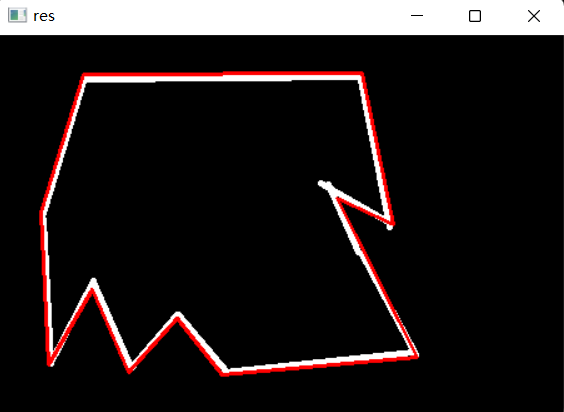

# 5. 外接矩形

x,y,w,h = cv2.boundingRect(cnt)

- 第一个参数,cnt，为InputArray array，一般为findContours函数查找的轮廓，包含轮廓的点集或者Mat；
- 返回值，x,y,w,h，返回值为最小外接矩形的Rect，即**左上点**与矩形的**宽度和高度**；

In [1]:
img = cv2.imread('01_Picture/10_contours.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 大于17的取255，小于127的取0       
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[6]

x,y,w,h = cv2.boundingRect(cnt) # 可以得到矩形四个坐标点的相关信息,x,y代表图像的原点坐标，w，h代表width,height
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255),2) #画出外接矩形
cv_show(img,'img')

NameError: name 'cv2' is not defined

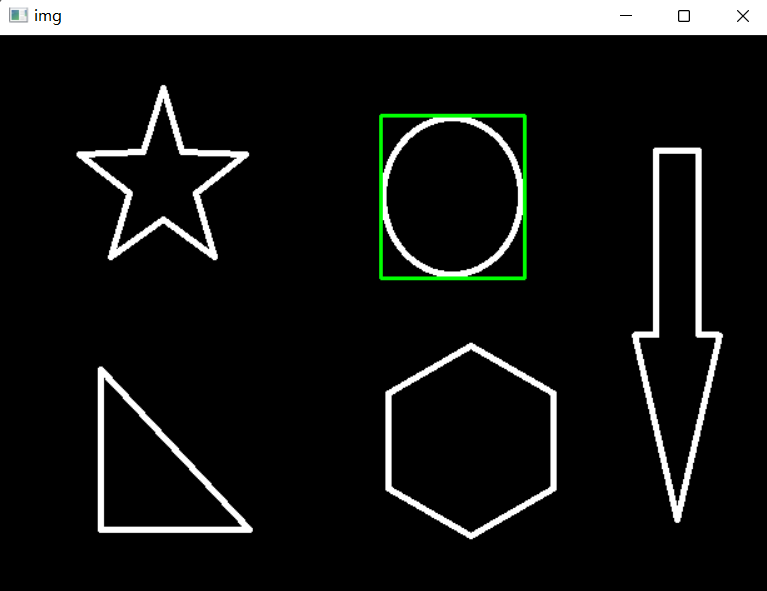

In [15]:
area = cv2.contourArea(cnt)
rect_area = w * h #轮廓所包围的面积
extent = float(area) / rect_area
print('轮廓面具与边界矩形比：',extent)

轮廓面具与边界矩形比： 0.7732441471571906


# 6. 外接圆

In [16]:
img = cv2.imread('01_Picture/10_contours.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 大于17的取255，小于127的取0       
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
(x,y),redius = cv2.minEnclosingCircle(cnt) #根据轮廓，使用minEnclosingCircle函数算出圆点和半径
center = (int(x),int(y))
redius = int(redius)
img = cv2.circle(draw_img,center,redius,(0,255,0),2) # 画出外接圆
cv_show(img,'img')

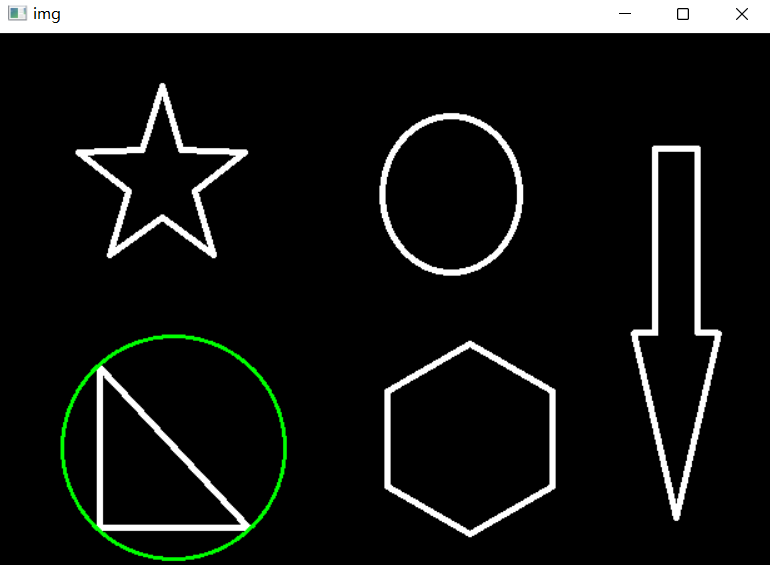